In [16]:
import numpy as np
from skimage.segmentation import slic
import nibabel as nib
import matplotlib.pyplot as plt


In [17]:
# Remove background using the mask
def remove_background(segments, data):
    # the space to remove is any pixel = 0
    object_mask = (data > 0)

    # Apply the mask to the original data to select the brain part only
    segmented_data = np.zeros_like(segments)
    np.copyto(segmented_data, segments, where=object_mask)

    return segmented_data

# given a list of paths, return a list of ids and True if all ids are equal, False otherwise
def get_patient_ids(paths):
    ids = []
    for path in paths:
        splitted_path = path.split("/")
        ids.append(splitted_path[-1].split("_")[1])
    if all(elem == ids[0] for elem in ids):
        return ids, True
    else:
        return ids, False

# merge a list of images into one image.
def combine_images(images, save=False):
    print(images)
    loaded_images = []
    ids, flag = get_patient_ids(images)
    if flag == True:
        for image in images:
            img = nib.load(image)
            loaded_images.append(img.get_fdata())
        combined_image = np.mean(loaded_images, axis=0)
        combined_nii = nib.Nifti1Image(combined_image, img.affine)
        # if save == True:
        #     nib.save(combined_nii, f"{dataset_path}BraTS2021_{ids[0]}/BraTS2021_{ids[0]}_combined.nii.gz")
    else:
        raise Exception("You are trying to merge images of different patients")
    return combined_nii

def _3Dplotter(numpy_image):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    ax1.imshow(numpy_image[numpy_image.shape[0] // 2, :, :])
    ax1.set_title("Sagittale")
    ax2.imshow(numpy_image[:, numpy_image.shape[1] // 2, :])
    ax2.set_title("Coronale")
    ax3.imshow(numpy_image[:, :, numpy_image.shape[2] // 2])
    ax3.set_title("Assiale")
    plt.show()


def apply_slic(input_image, pid, n_segments=15000, compactness=0.1, save=False):
    data = input_image.get_fdata()
    segments = slic(data, n_segments=n_segments, compactness=compactness, multichannel=False)
    segmented_data = remove_background(segments, data)

    # if save == True:
    #     # Save results of SLIC
    #     segmented_image = nib.Nifti1Image(segmented_data, input_image.affine, input_image.header)
    #     nib.save(segmented_image, f"{dataset_path}BraTS2021_{pid}/BraTS2021_{pid}_SLIC.nii.gz")
    
    return segmented_data

In [2]:
images_file = ['../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_flair.nii.gz', '../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_t1.nii.gz',
               '../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_t1ce.nii.gz', '../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_t2.nii.gz']

In [5]:
merged_image = combine_images(images_file, save=False)

['../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_flair.nii.gz', '../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_t1.nii.gz', '../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_t1ce.nii.gz', '../datasets/preprocessed_dataset/BraTS2021_01342/BraTS2021_01342_t2.nii.gz']


In [14]:
segmented_image = apply_slic(merged_image, n_segments=2, compactness=1, save=False, pid='01342')

e:\Tesi Progetto\.venv\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `slic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  warnings.warn(self.warning_msg.format(


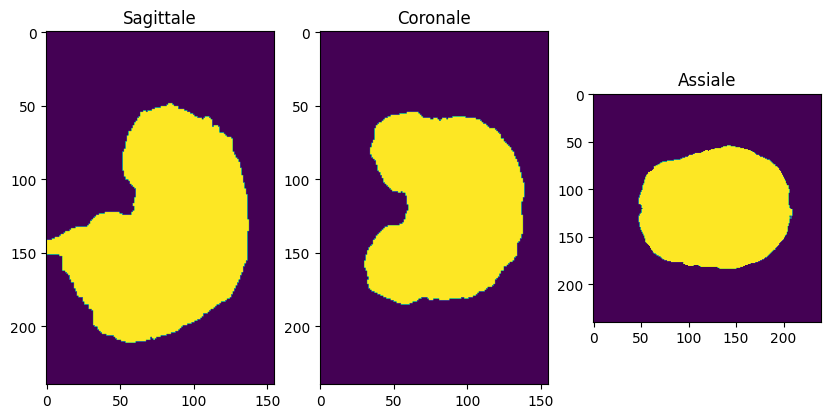

In [18]:
_3Dplotter(segmented_image)